In [435]:
## Some stats for Betrayal at House on the Hill using Markov chains
## Wanted to know probability of a haunt being given based on number of omen cards available.
## To know the probability of various rolls where you need to roll m dice to get n or higher value

In [462]:
## Takes the number of dice and produces the probability of
## obtaining each value

def die_prob(n_dice):
    ##  n_dice are number of dice being rolled
    ##  returns the probability 
    import numpy as np
    import math
    from scipy.stats import binom

    die_states = [0,1,2] # possible die states
    n_die_states = len(die_states) # number of die states

    n_dice_states = n_die_states**n_dice # total states, including degenerate states
    n_dice_states_unique = 2*n_dice +1 # total non-degenerate states(trinomial triangle)

    n_states = n_dice_states_unique # Set size of matrix based on total number of unique states
    T = np.zeros((n_states,n_states)) #initialize transition matrix

    # Create transition matrix
    # size is based on number of possible unique states
    for i in range(0, n_states):
        for j in range(0, n_states):
            if i == n_states-1 and j== n_states-1:
                T[i,j] = 1
            elif i == n_states-2 and j==n_states-1:
                T[i,j] = 1/2
                T[i,j-1]=1/2
            elif i==j-1:
                T[i,j] = 1/3
                T[i,j+1] = 1/3
                T[i,j-1] = 1/3


    init_state = np.zeros(n_states) # create state vector
    init_state[0] = 1 # initial state is at 0
    curr_state = init_state  

    T_n = np.linalg.matrix_power(T,n_dice) # raise transition matrix to power of dice being rolled
    x_n = np.dot(curr_state,T_n) # Current state of the system

    return x_n

In [463]:
# Test probabilities
n_dice, n_targ = 6, 2
prob = 100*die_prob(n_dice)
print("Probability of getting various values with ", n_dice, "dice: ", prob, "%.")

Probability of getting various values with  6 dice:  [  0.13717421   0.82304527   2.88065844   6.85871056  12.34567901
  17.28395062  19.34156379  17.28395062  12.34567901   6.85871056
   2.88065844   0.82304527   0.13717421] %.


In [464]:
## Calculates probability that your roll will be n_targ or lower, given the number of dice n_dice
def die_prob_lower(n_dice, n_targ):
    
    s = np.sum(x_n[0:n_targ])
    return s

[0.0, 0.1371742112482853, 0.96021947873799718, 3.8408779149519887, 10.699588477366254, 23.045267489711929, 40.329218106995881, 59.670781893004111, 76.954732510288054, 89.300411522633738, 96.159122085047997, 99.039780521261989, 99.862825788751692]


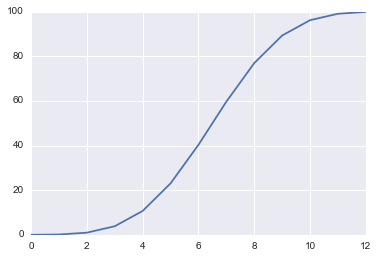

In [467]:
#Plotting probability of starting a haunt based on number of omen cards in play
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0,13)
y = []
for i in range(0,13):
    y.append(die_prob_lower(n_dice,i)*100)
print(y)

plt.plot(x,y)


In [439]:
## Calculates probability that your roll will be n_targ or higher, given the number of dice n_dice
def die_prob_higher(n_dice, n_targ):
    
    s = 1 - np.sum(x_n[0:n_targ])
    return s

In [440]:
# Test various probabilities
n_dice, n_targ = 1,0 # number of dice thrown, number in added dice faces you want to reach
prob = die_prob_higher(n_dice,n_targ)
prob_percent = prob*100

print("Probability of getting ", n_targ, "or higher with ", n_dice, "dice: ", prob_percent, "%.")

Probability of getting  0 or higher with  1 dice:  100.0 %.


In [411]:
## Create a table showing the probability of having a target value, n_tar, or higher based on dice rolled, n_dice
## columns are the target number, n_tar
## rows are the number of dice rolled, n_dice
# Create list of lists of the possible dice and target probabilities
n_dice_max, n_tar_max = 10, 10

t1 = []
for i in range(1,n_dice_max+1):
    x1 = []
    for j in range(0,n_tar_max+1):
        x1.append((die_prob_higher(i,j))*100)
    t1.append(x1)

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

d1 = pd.DataFrame(t1,index=[np.arange(1,n_dice_max+1)])
d2 = d1.round(decimals=3)

d2
#d2.to_csv('dice_dmg_prob.csv')

0       1       2       3       4       5       6       7       8   \
1   100.0  66.667  33.333   0.000   0.000   0.000   0.000   0.000   0.000   
2   100.0  88.889  66.667  33.333  11.111   0.000   0.000   0.000   0.000   
3   100.0  96.296  85.185  62.963  37.037  14.815   3.704   0.000   0.000   
4   100.0  98.765  93.827  81.481  61.728  38.272  18.519   6.173   1.235   
5   100.0  99.588  97.531  91.358  79.012  60.494  39.506  20.988   8.642   
6   100.0  99.863  99.040  96.159  89.300  76.955  59.671  40.329  23.045   
7   100.0  99.954  99.634  98.354  94.833  87.471  75.309  58.985  41.015   
8   100.0  99.985  99.863  99.314  97.607  93.553  85.871  73.922  58.436   
9   100.0  99.995  99.949  99.721  98.928  96.825  92.344  84.449  72.743   
10  100.0  99.998  99.981  99.888  99.533  98.491  96.032  91.206  83.178   

        9       10  
1    0.000   0.000  
2    0.000   0.000  
3    0.000   0.000  
4    0.000   0.000  
5    2.469   0.412  
6   10.700   3.841  
7   24.691  12.529  
8   41.564  26.078  
9   57.974  42.026  
10  71.722  57.581